# Assignment 1

## Part 1: Visualizing patterns in the data

In [1]:
import pandas as pd

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Plot that captures the development of focus crimes across weekdays:

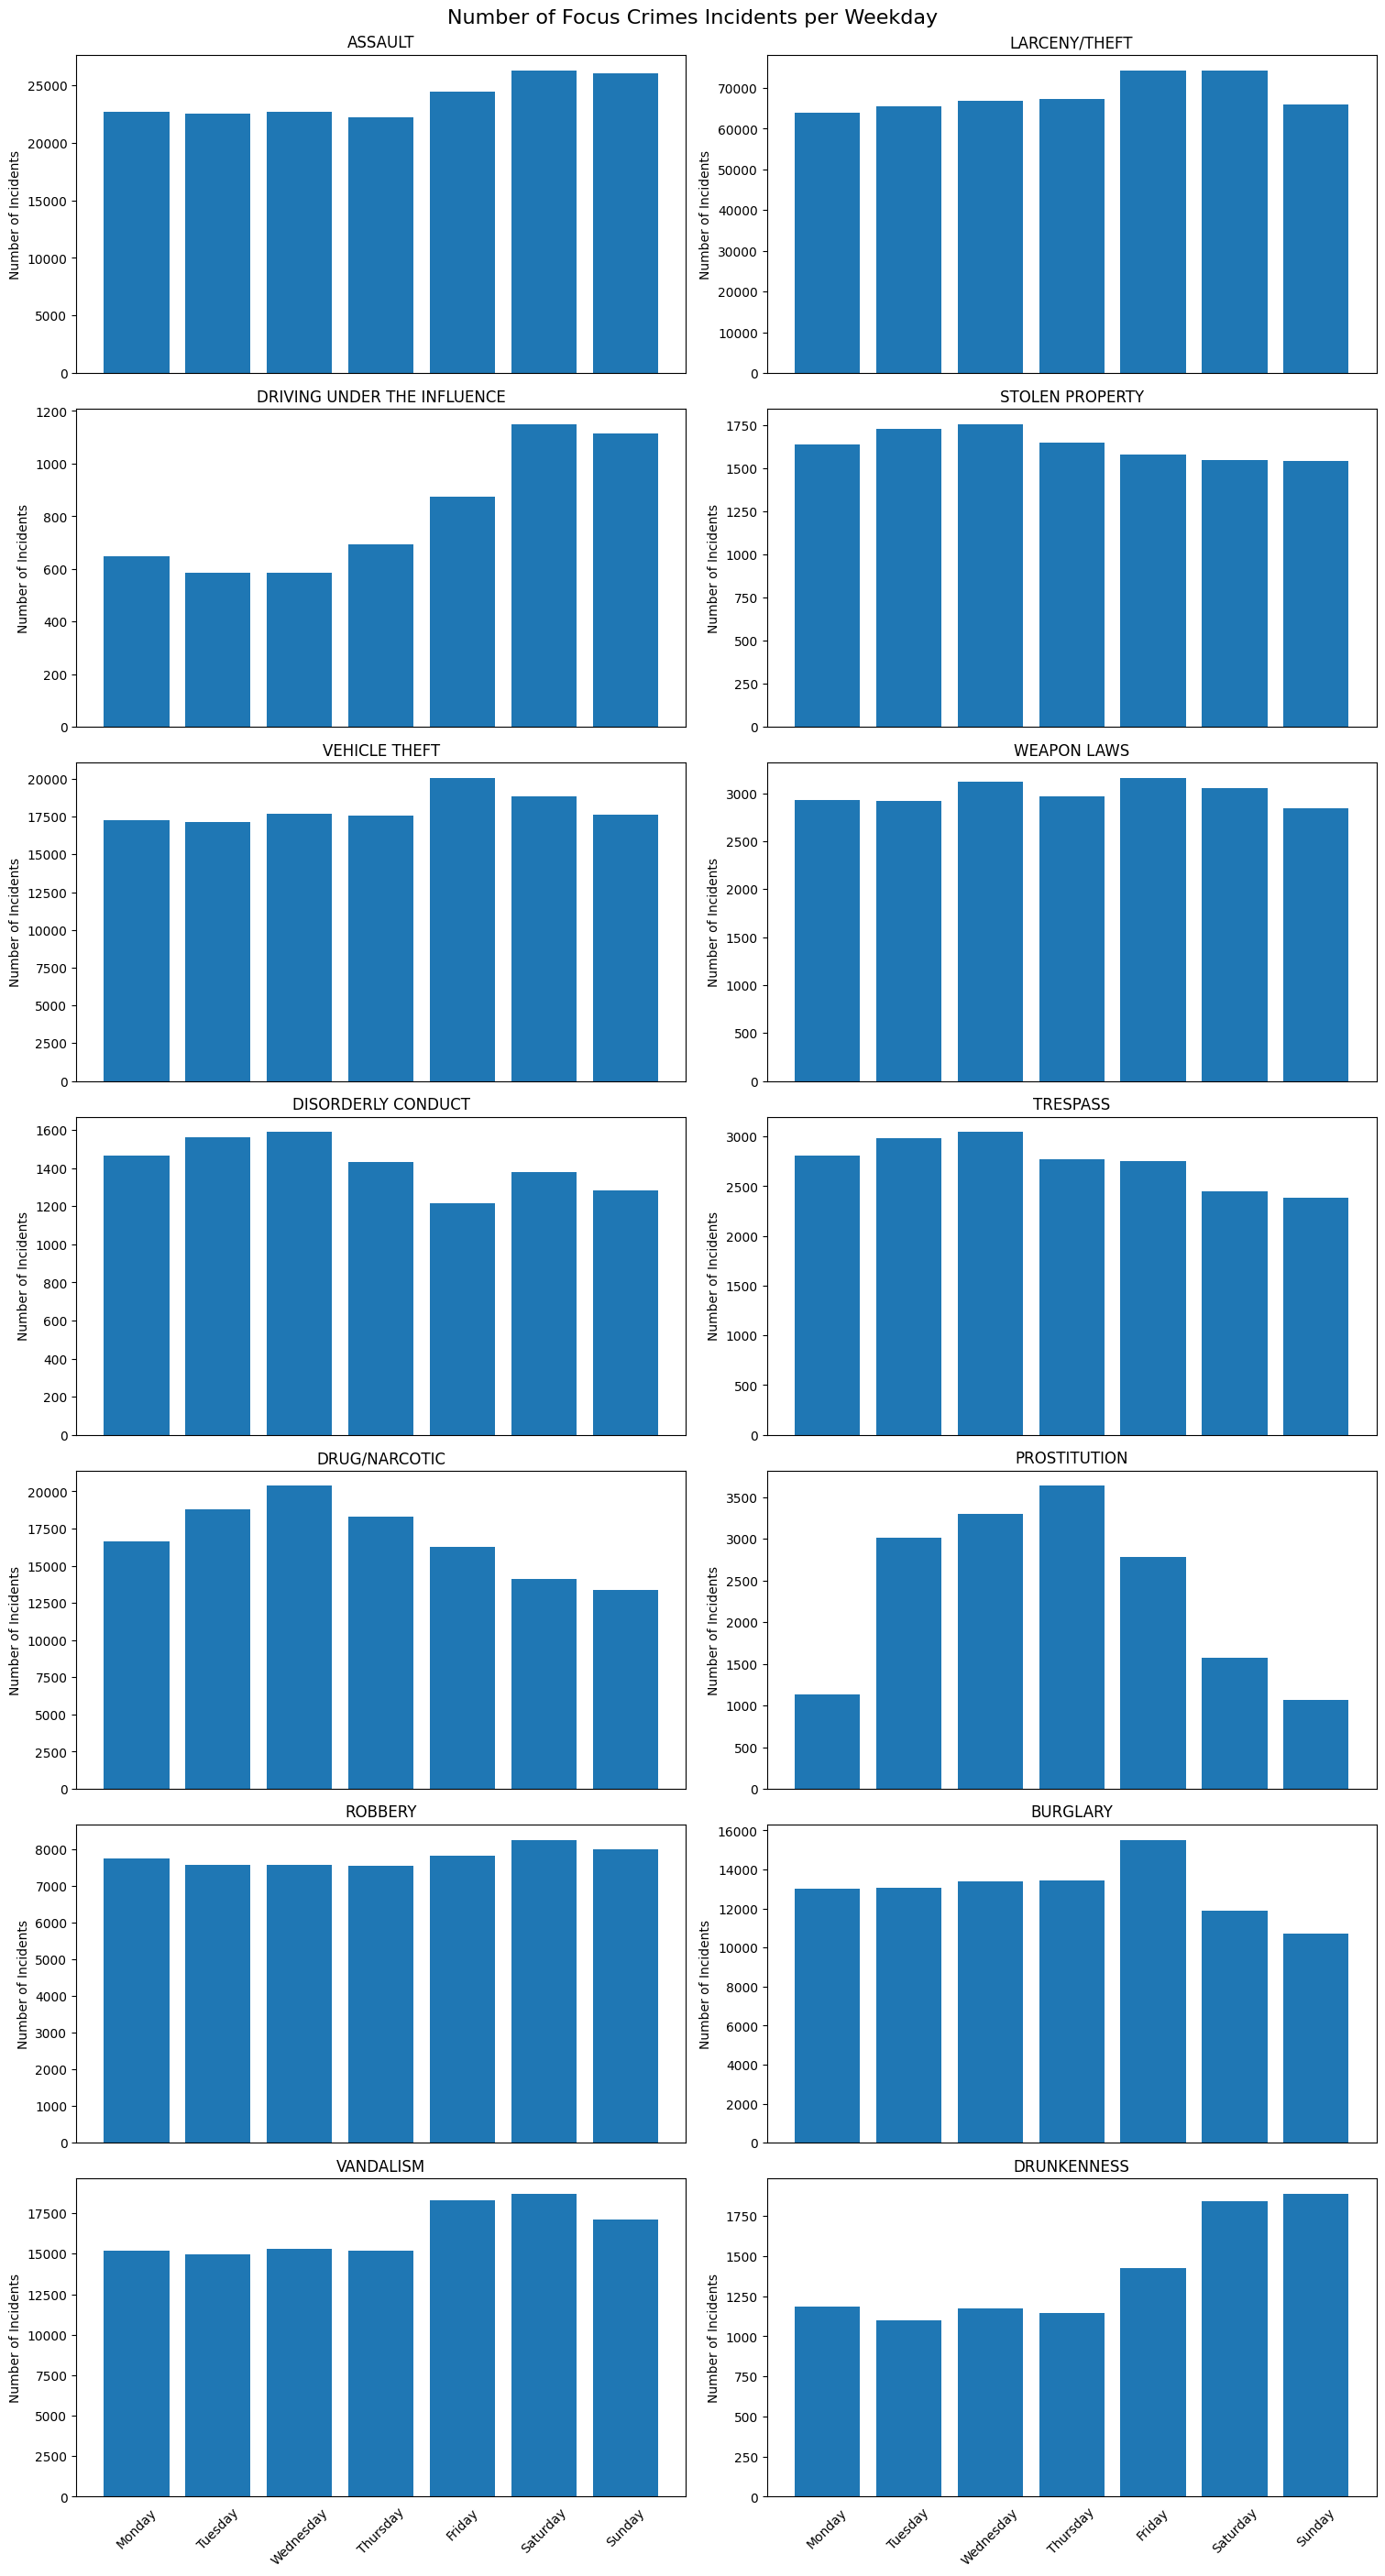

In [2]:
import matplotlib.pyplot as plt

crime_occurrences = data[data['Category'].isin(focuscrimes)].groupby(["Category", "DayOfWeek"]).size().reset_index(name='Count')

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].copy()
    cat_data['DayOfWeek'] = pd.Categorical(cat_data['DayOfWeek'], categories=weekdays, ordered=True)
    cat_data = cat_data.sort_values('DayOfWeek')
    ax.bar(cat_data['DayOfWeek'], cat_data['Count'])
    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents per Weekday', fontsize=16)
plt.show()

#### Comments:

XYZ

### Plot that captures the development of focus crimes across the months:

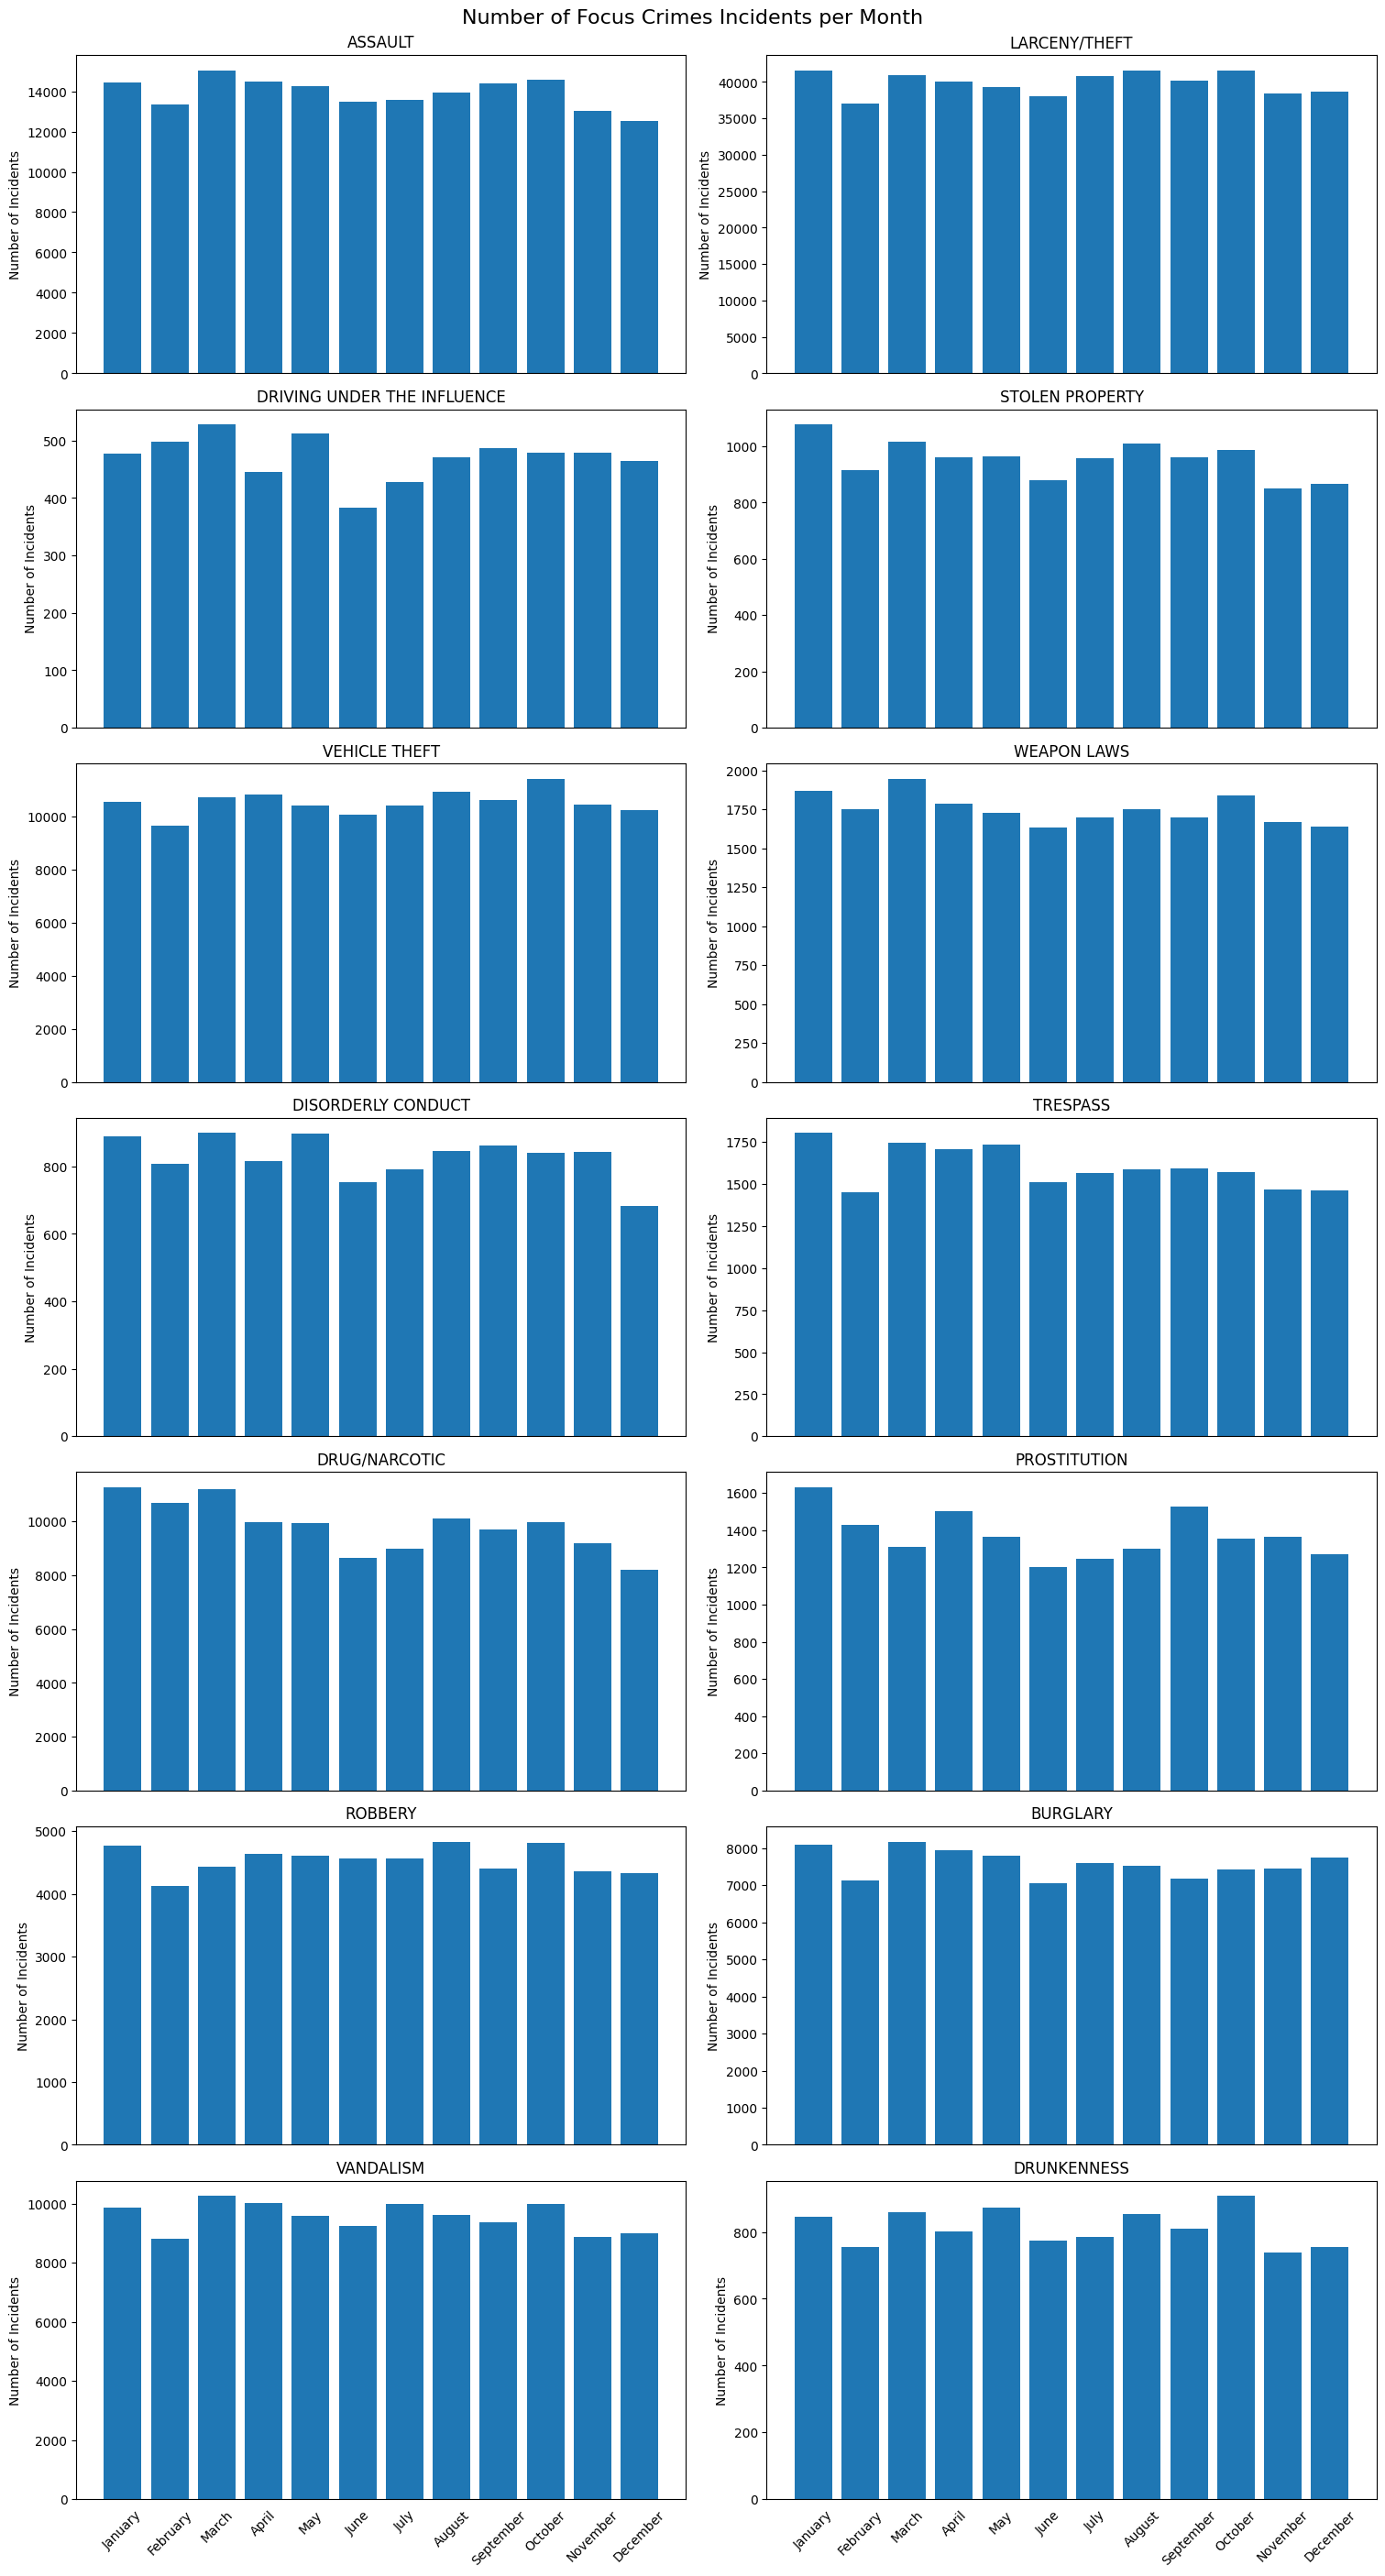

In [3]:
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', pd.to_datetime(data['Date']).dt.month]).size().reset_index(name='Count'))

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].copy()
    cat_data['Date'] = cat_data['Date'].map(months)
    ax.bar(cat_data['Date'], cat_data['Count'])
    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents per Month', fontsize=16)
plt.show()

#### Comments:

XYZ

### Plot that captures the development of focus crimes across the 24-hour cycle:

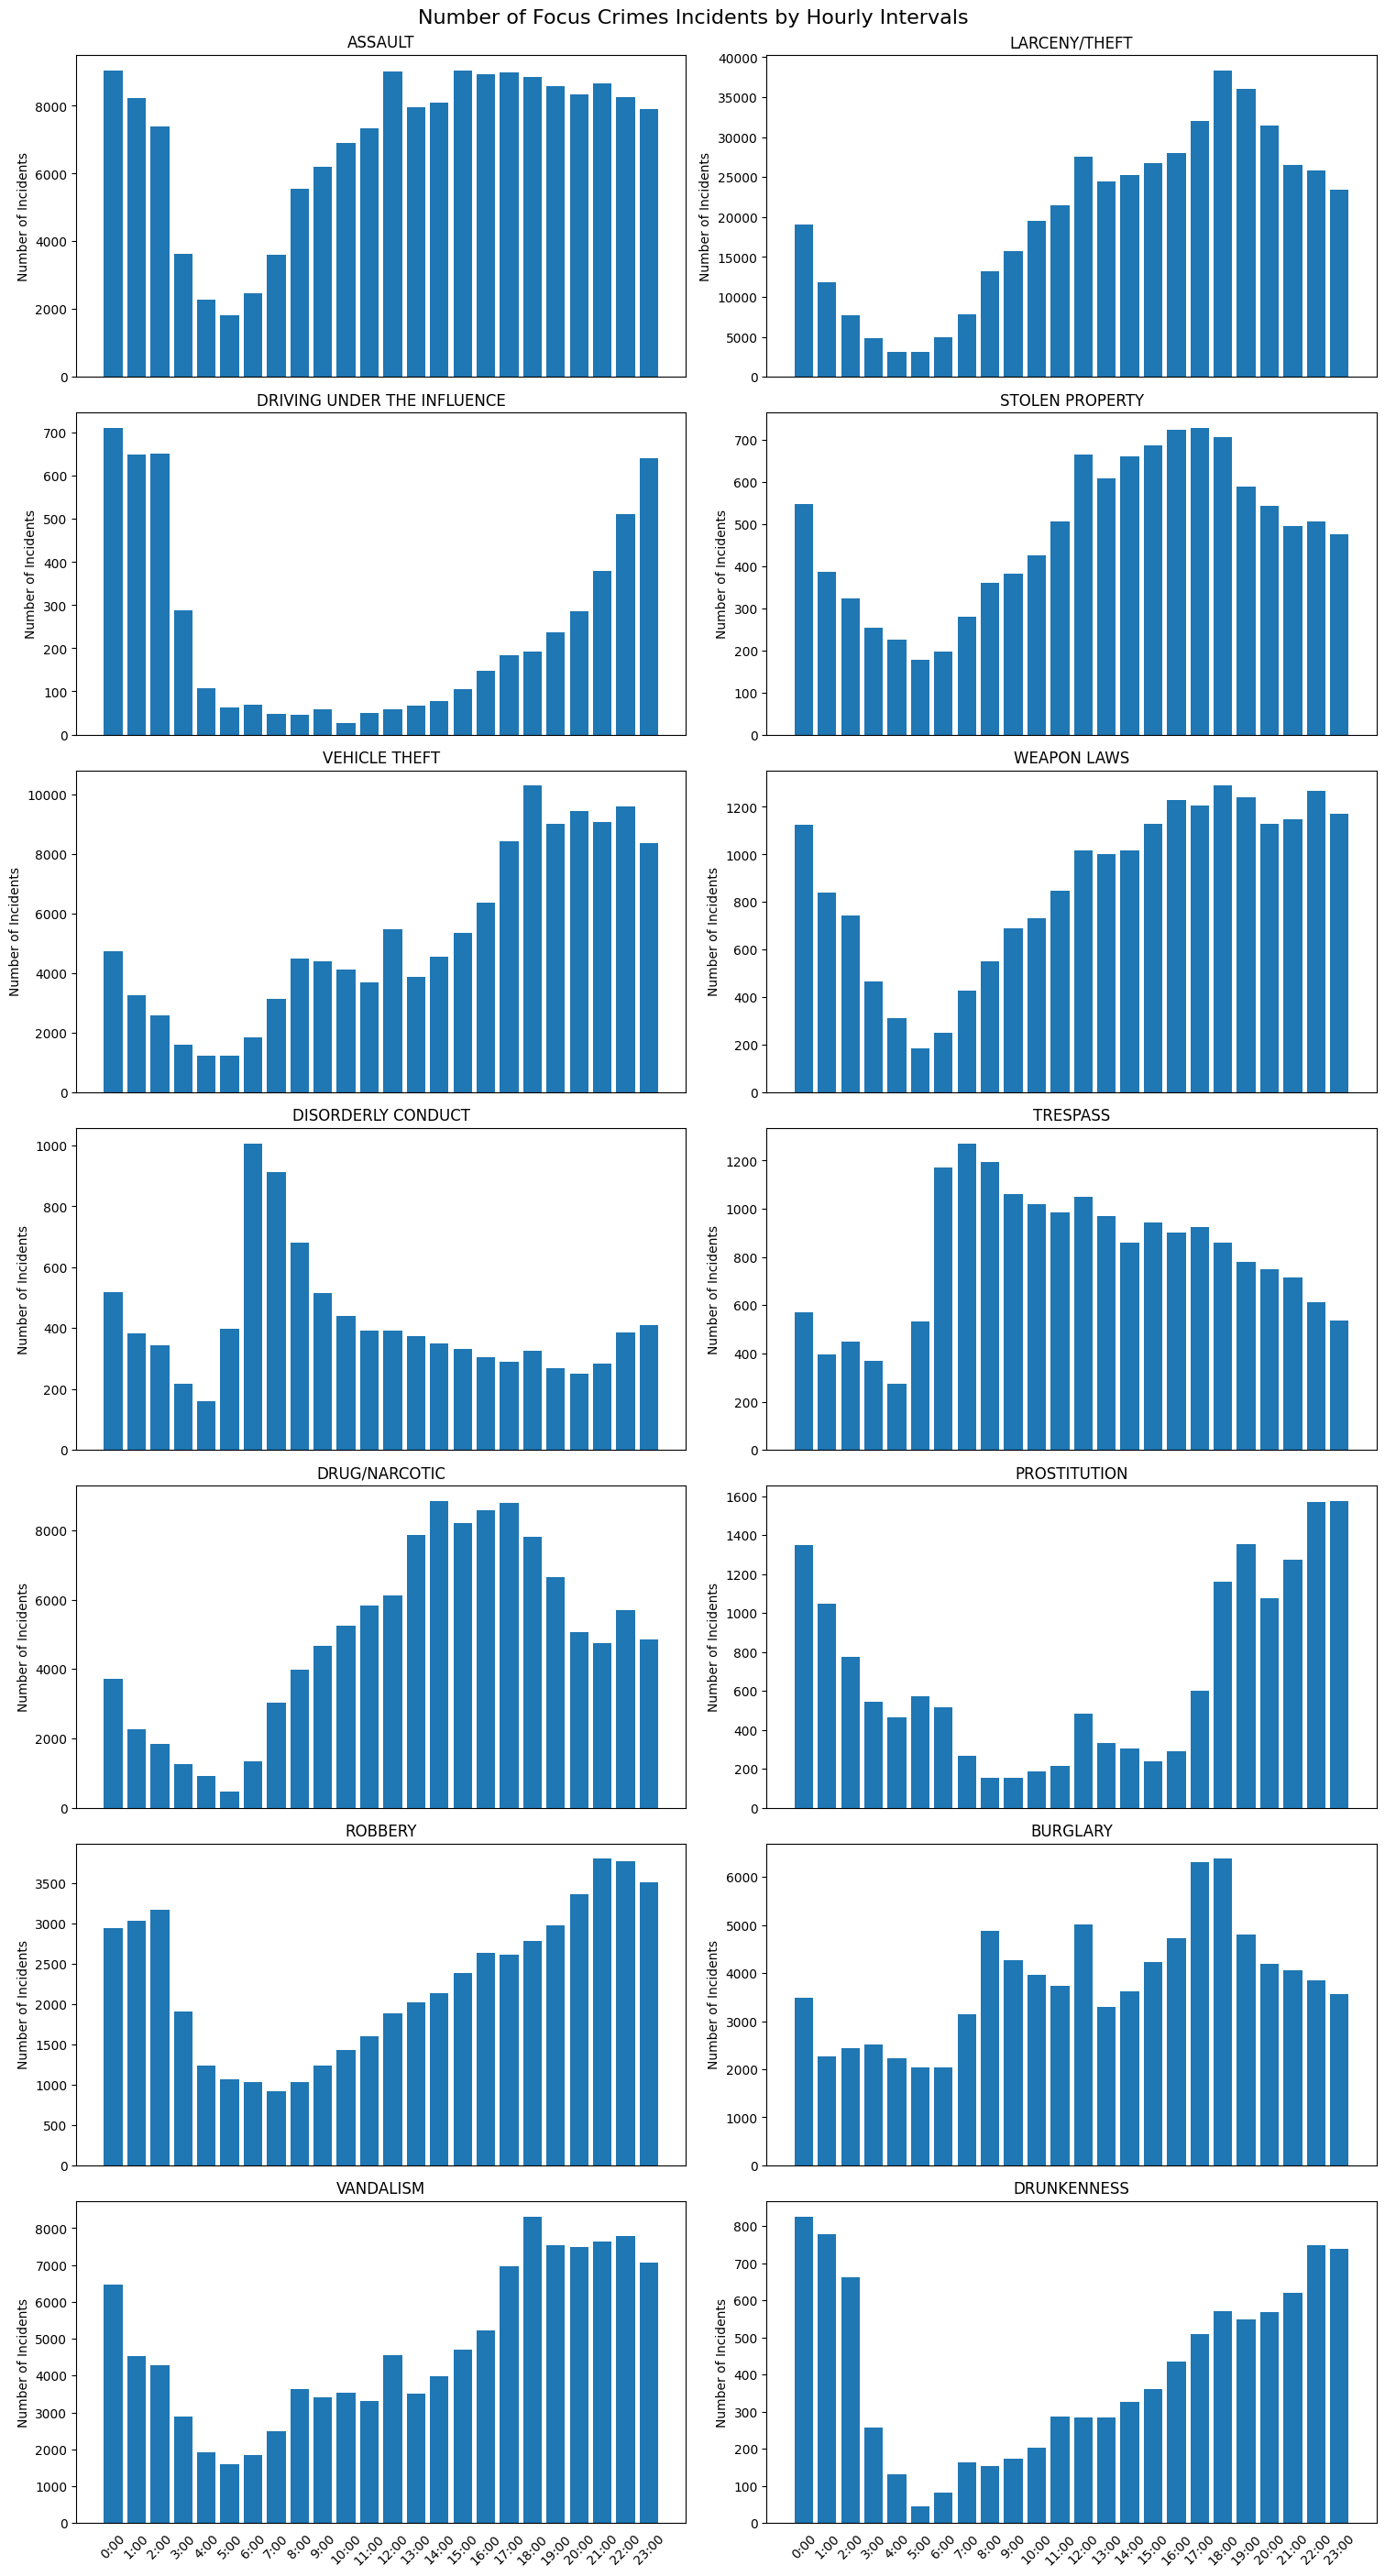

In [4]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', 'Hour']).size().reset_index(name='Count'))

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].sort_values('Hour')
    ax.bar(cat_data['Hour'], cat_data['Count'])
    ax.set_title(category)
    ax.set_ylabel('Number of Incidents')
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents by Hourly Intervals', fontsize=16)
plt.show()

#### Comments:

XYZ

### Plot that captures the development of focus crimes across hours of the week:

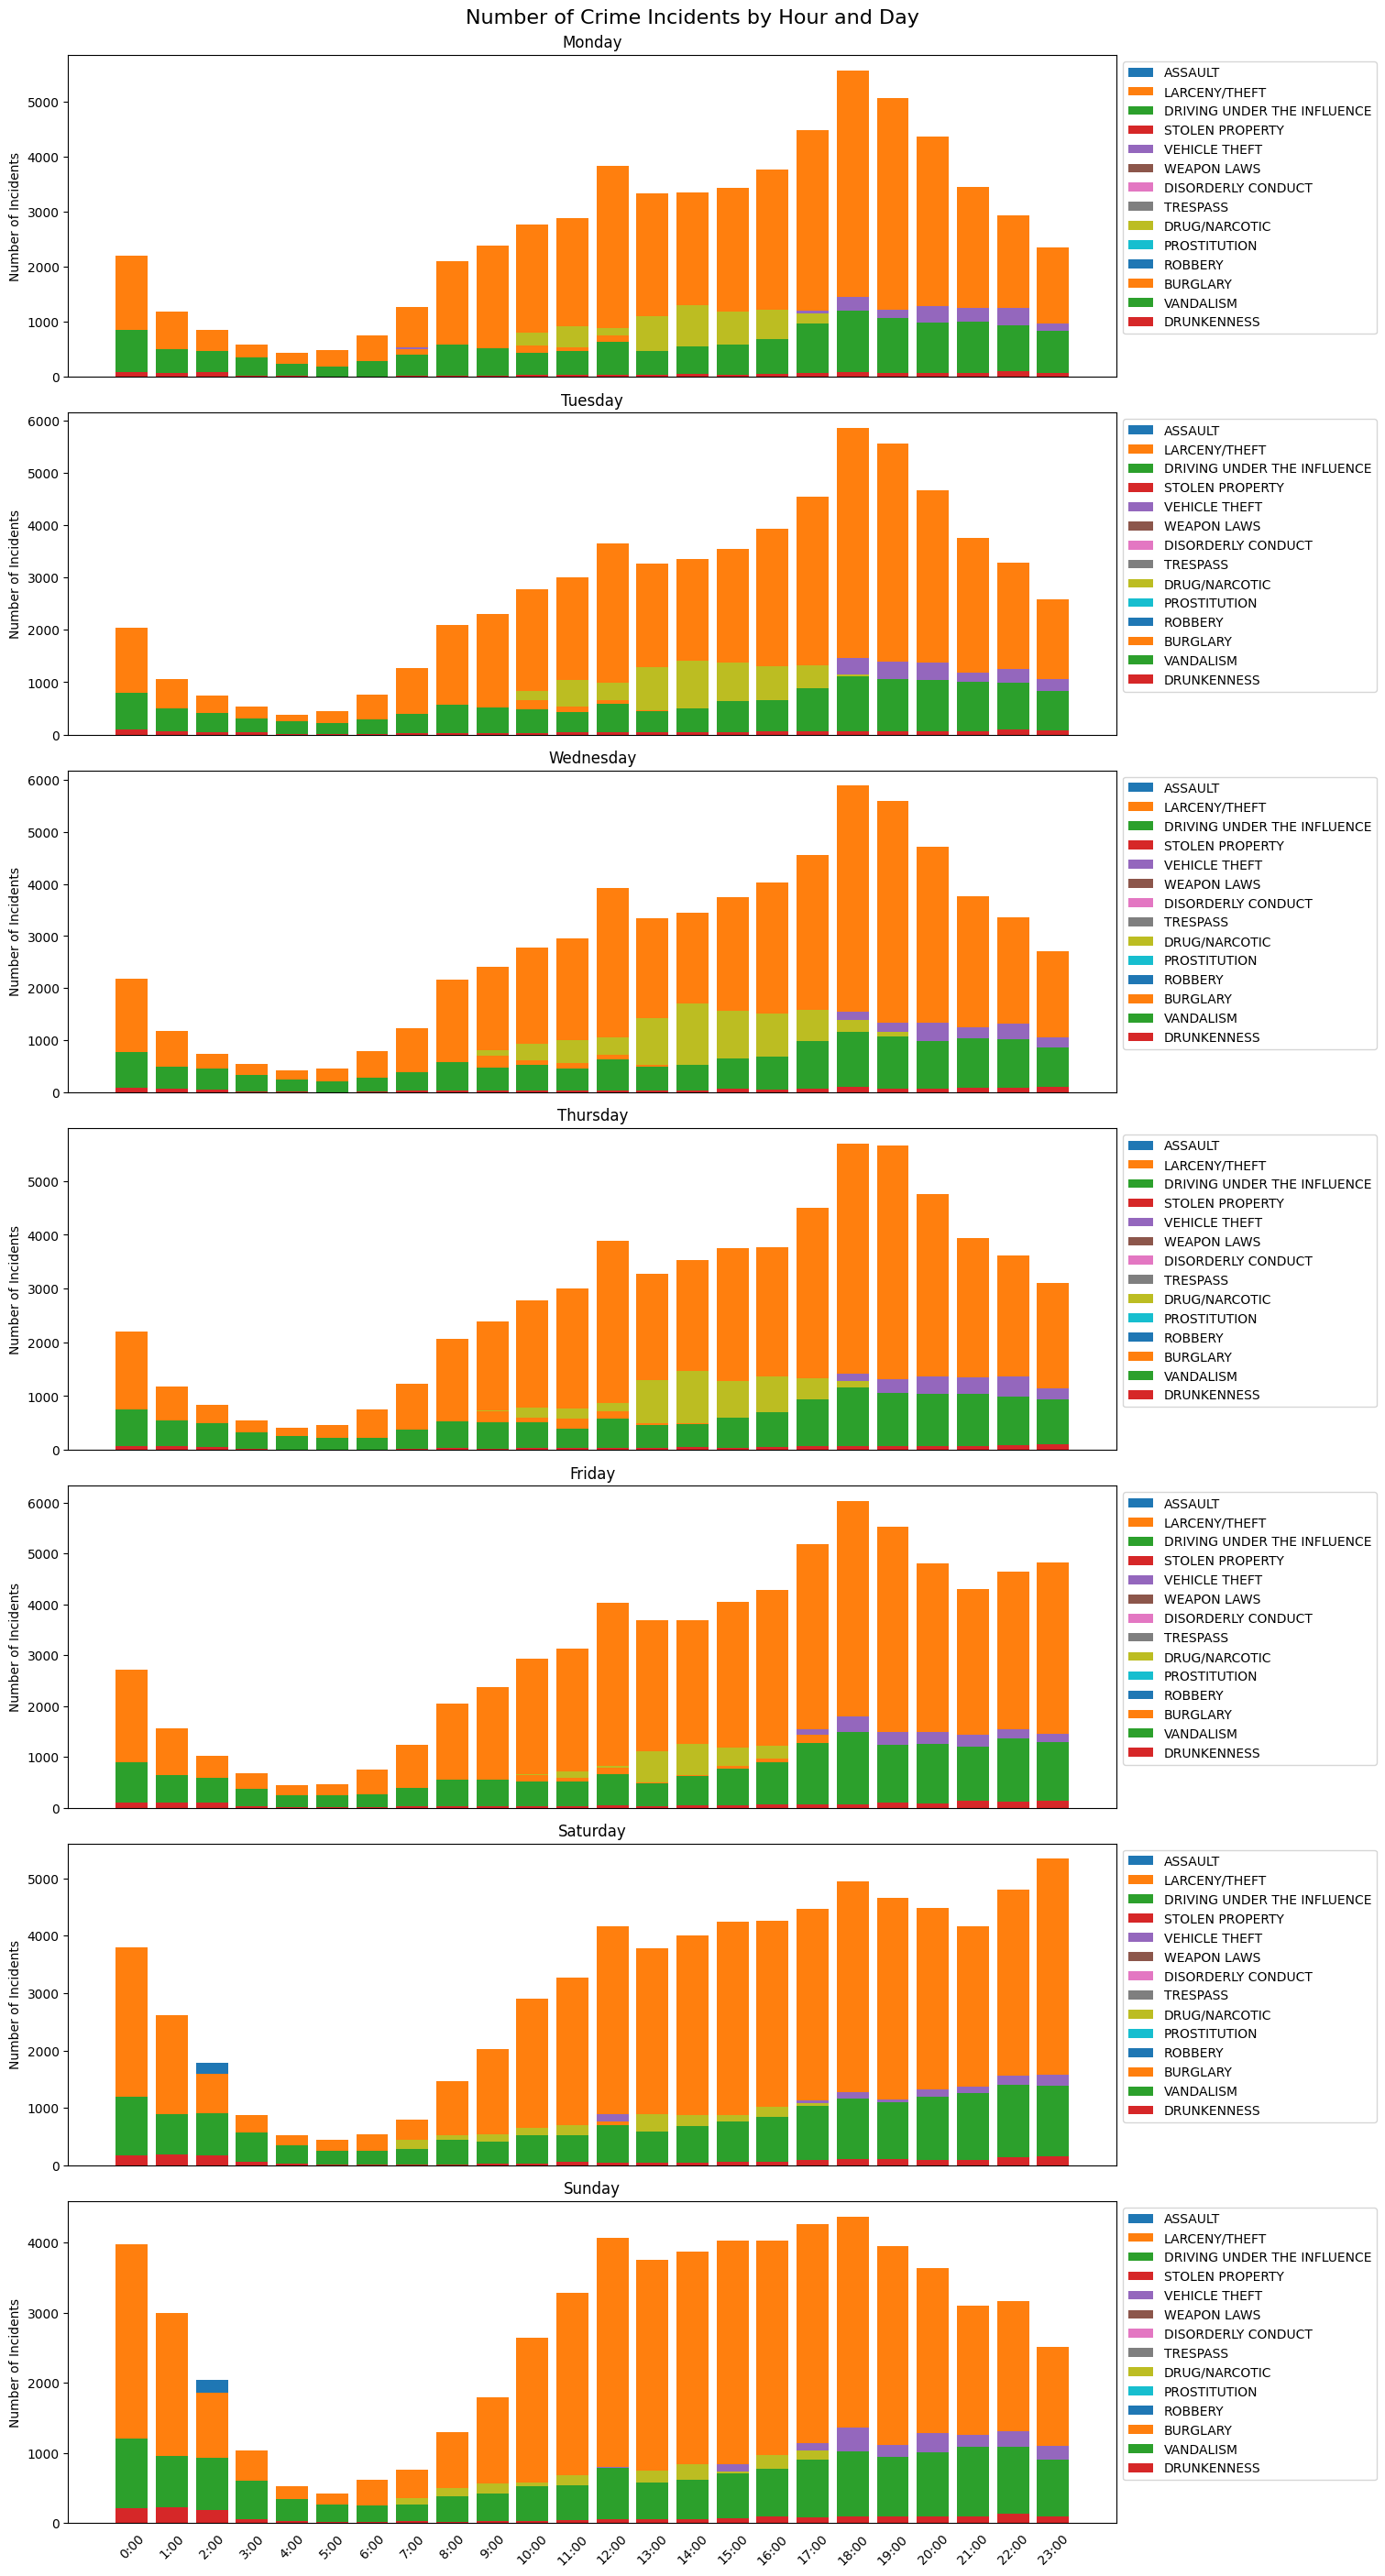

In [5]:
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', 'DayOfWeek', 'Hour']).size().reset_index(name='Count'))
crime_occurrences['DayOfWeek'] = pd.Categorical(crime_occurrences['DayOfWeek'], categories=weekdays, ordered=True)
crime_occurrences.sort_values(by=['DayOfWeek', 'Hour', 'Count'], ascending=[True, True, False], inplace=True)

fig, axs = plt.subplots(7, 1, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

for i, day in enumerate(weekdays):
    ax = axs[i]
    for category in focuscrimes:
        day_data = crime_occurrences[(crime_occurrences['Category'] == category) & (crime_occurrences['DayOfWeek'] == day)]
        ax.bar(day_data['Hour'], day_data['Count'], label=category)
        
    ax.set_ylabel('Number of Incidents')
    ax.set_title(day)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Crime Incidents by Hour and Day', fontsize=16)
plt.show()

#### Comments:

XYZ

### Calendar Plot of Stolen Property

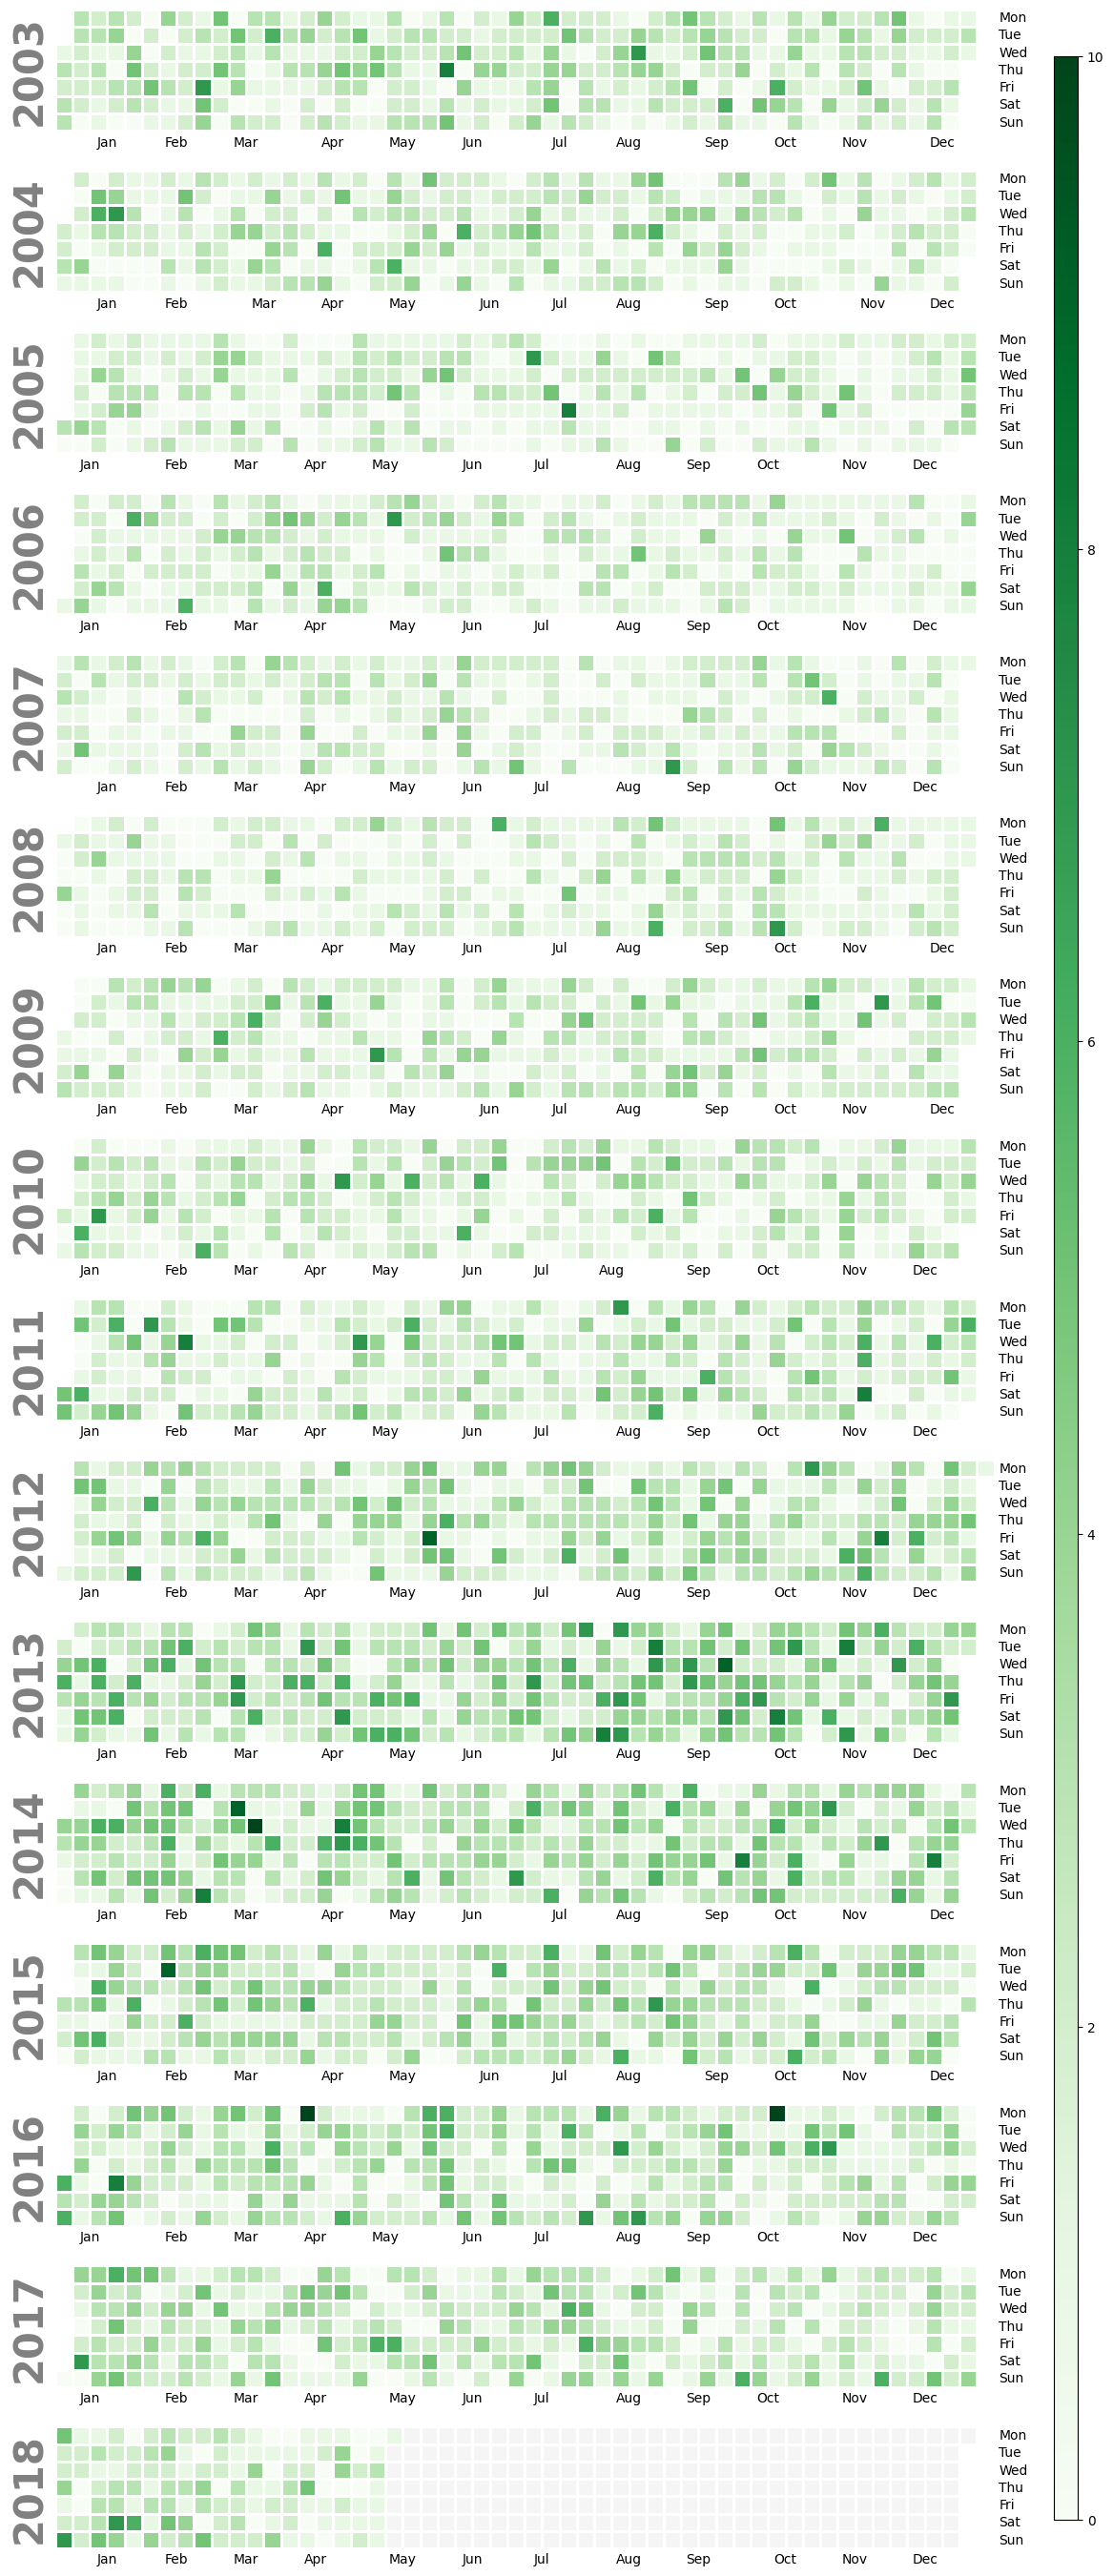

In [6]:
import calplot

cat_data = data[data['Category'] == 'STOLEN PROPERTY'].copy()

cat_data['Date'] = pd.to_datetime(cat_data['Date'])
cat_data['Year'] = cat_data['Date'].dt.year
cat_data['Month'] = cat_data['Date'].dt.month
cat_data['Day'] = cat_data['Date'].dt.day

crime_occurrences = cat_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Count')
crime_occurrences['Date'] = pd.to_datetime(crime_occurrences[['Year', 'Month', 'Day']])
crime_occurrences.set_index('Date', inplace=True)

calplot.calplot(crime_occurrences['Count'], cmap='Greens', edgecolor=None, yearlabel_kws={'fontname':'sans-serif'})
plt.show()

#### Comments:

XYZ

### Polar Plot of Vandalism

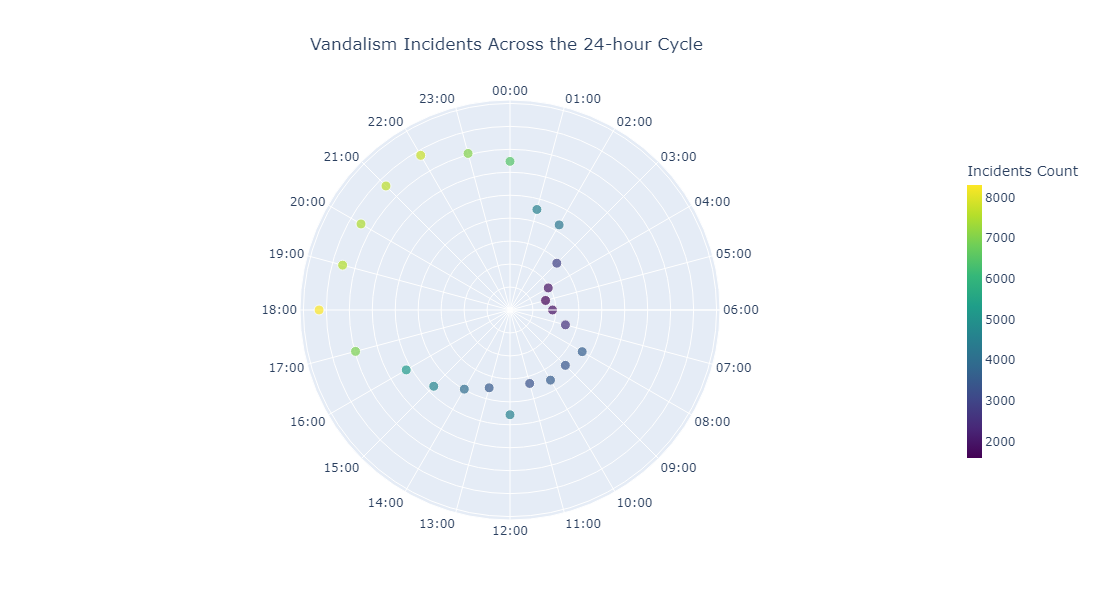

In [7]:
import pandas as pd
import plotly.graph_objects as go

cat_data = data[data['Category'] == 'VANDALISM']
crime_occurrences = cat_data.groupby(['Hour']).size().reset_index(name='Count')

max_count = crime_occurrences['Count'].max()
range_margin = 0.1 * max_count
radial_range = [0, max_count + range_margin]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=crime_occurrences['Count'],
    theta=[f'{hour:02d}:00' for hour in range(24)],
    mode='markers', 
    marker=dict(
        size=10,  
        color=crime_occurrences['Count'],  
        colorscale='Viridis',  
        opacity=0.7,
        line=dict(color='white', width=1), 
        colorbar=dict(
            title='Incidents Count',  
            thickness=15,  
            len=0.75,  
        ),
    ),
    hoverinfo='r+theta',
    hovertemplate='%{r} incidences at %{theta}<extra></extra>',
    hoverlabel=dict(bgcolor='white', font_size=12),
))

fig.update_layout(
    title='Vandalism Incidents Across the 24-hour Cycle',
    title_x=0.46,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=radial_range,
            showticklabels=False
        ),
        angularaxis=dict(direction="clockwise"),
    ),
    height=600,
)

fig.show()

#### Comments:

XYZ

### Use of the LLM:

XYZ

## A1 Part 2: Dataviz questions

### What is the difference between data and metadata? How does that relate to the GPS tracks-example?

XYZ

### The human eye is a great tool for data analysis. Do you agree? Explain why/why not:

- Mention something that the human eye is very good at.
- Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.

### Simpson's paradox is hard to explain. Come up with your own example - or find one on line:

XYZ

### In your own words, explain the difference between exploratory and explanatory data analysis:

XYZ

## A1 Part 3: Visualizing geodata using Plotly

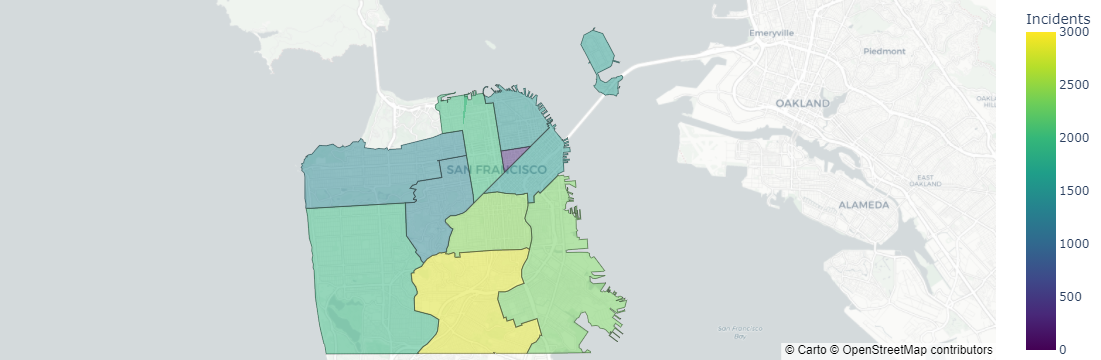

In [60]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    sfpd = json.load(response)

focus_districts = set(['CENTRAL', 'SOUTHERN', 'BAYVIEW', 'MISSION', 'PARK', 'RICHMOND', 'INGLESIDE', 'TARAVAL', 'NORTHERN', 'TENDERLOIN'])

vehicle_theft = data[data['PdDistrict'].isin(focus_districts) & (data['Category'] == 'VEHICLE THEFT') & (data['DayOfWeek'] == 'Sunday')]
vehicle_theft = vehicle_theft.groupby('PdDistrict').size().reset_index(name='Count')

import plotly.express as px

fig = px.choropleth_mapbox(vehicle_theft, geojson=sfpd, locations='PdDistrict', color='Count',
                           color_continuous_scale="Viridis",
                           range_color=(0, 3000),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'Count':'Incidents'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?

XYZ

### Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):

- Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
- Why do you think perceptual errors are a problem? Try to think of a few examples.